# 전처리

## 메모리 변수 제거

In [ ]:
# 메모리 변수 모두 제거
all = [var for var in globals() if var[0] != "_"]
for var in all:
    del globals()[var]

## 한글

In [ ]:
!apt-get install -y fonts-naum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.cache/matplotlib > /dev/null

E: Unable to locate package fonts-naum


## 사용 패키지

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family = 'Malgun Gothic') # WINDOWS
plt.rc('font', family='NanumBarunGothic')
plt.rc('font', family = 'AppleGothic') # MAC
plt.rc('axes', unicode_minus = False)
import warnings
warnings.filterwarnings('ignore')


## 데이터 로드

In [ ]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
submission = pd.read_csv('data/sample_submission.csv')
lunch = pd.read_csv('data/lunch.csv')
dinner = pd.read_csv('data/dinner.csv')
corona = pd.read_csv('data/corona.csv')

### train.csv
- 일자 : 연-월-일
- 요일 : 월, 화, 수, 목, 금
- 본사정원수 : 총 직원 수
- 본사휴가자수 : 휴가 중인 인원수
- 본사출장자수 : 본사 소속이나 타지역에 근무 중인 인원 수
- 본사시간외근무명령서승인건수 : 해당 일자에 초과 근무한 인원 수
- 현본사소속재택근무자수 : 재택근무하여 구내식당 이용불가한 인원 수
- 조식메뉴 : 아침 식사 메뉴 (각 재료의 원산지)
- 중식메뉴 : 점심 식사 메뉴 (각 재료의 원산지)
- 석식메뉴 : 저녁 식사 메뉴 (각 재료의 원산지)
- 중식계 : 구내식당에서 점심 식사한 인원 수
- 석식계 : 구내식당에서 저녁 식사한 인원 수

### test.csv
- 일자 : 연-월-일
- 요일 : 월, 화, 수, 목, 금
- 본사정원수 : 총 직원 수
- 본사휴가자수 : 휴가 중인 인원수
- 본사출장자수 : 본사 소속이나 타지역에 근무 중인 인원 수
- 본사시간외근무명령서승인건수 : 해당 일자에 초과 근무한 인원 수
- 현본사소속재택근무자수 : 재택근무하여 구내식당 이용불가한 인원 수
- 조식메뉴 : 아침 식사 메뉴 (각 재료의 원산지)
- 중식메뉴 : 점심 식사 메뉴 (각 재료의 원산지)
- 석식메뉴 : 저녁 식사 메뉴 (각 재료의 원산지)

### sample_submission.csv
- 일자 : 연-월-일
- 중식계 : 구내식당에서 점심 식사한 인원 수
- 석식계 : 구내식당에서 저녁 식사한 인원 수

### lunch.csv

### dinner.csv

### corona.csv

In [ ]:
print(train.shape)
print(test.shape)
print(submission.shape)
print(lunch.shape)
print(dinner.shape)
print(corona.shape)

(1205, 12)
(50, 10)
(50, 3)
(1894, 7)
(1894, 7)
(407, 2)


In [ ]:
lunch.head()

,일자,우산,쾌적,불쾌,저온,중온,고온
0,2016-02-01,0,1,0,0,1,0
1,2016-02-02,0,1,0,0,1,0
2,2016-02-03,0,1,0,0,1,0
3,2016-02-04,0,1,0,0,1,0
4,2016-02-05,0,1,0,0,1,0


## lunch, dinner column 명이 같아서 L과 D로 구분

In [ ]:
lunch.rename(columns = {'우산' : '우산L','쾌적' : '쾌적L','불쾌' : '불쾌L','저온' : '저온L','중온' : '중온L','고온' : '고온L'}, inplace = True)
dinner.rename(columns = {'우산' : '우산D','쾌적' : '쾌적D','불쾌' : '불쾌D','저온' : '저온D','중온' : '중온D','고온' : '고온D'}, inplace = True)

In [ ]:
print(train.columns)
print(lunch.columns)
print(dinner.columns)
print(corona.columns)

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계'],
      dtype='object')
Index(['일자', '우산L', '쾌적L', '불쾌L', '저온L', '중온L', '고온L'], dtype='object')
Index(['일자', '우산D', '쾌적D', '불쾌D', '저온D', '중온D', '고온D'], dtype='object')
Index(['일자', '코로나신규확진자'], dtype='object')


## train.csv에 lunch.csv&dinner.csv left join

In [ ]:
train_lunch_left_join = pd.merge(train, lunch, left_on='일자', right_on='일자', how='left')
test_lunch_left_join = pd.merge(test, lunch, left_on='일자', right_on='일자', how='left')

In [ ]:
print(train_lunch_left_join.columns)
print(train_lunch_left_join.shape)
train_lunch_left_join.head()

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', '우산L', '쾌적L',
       '불쾌L', '저온L', '중온L', '고온L'],
      dtype='object')
(1205, 18)


,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,우산L,쾌적L,불쾌L,저온L,중온L,고온L
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,0,1,0,0,1,0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,0,1,0,0,1,0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,0,1,0,0,1,0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,0,1,0,0,1,0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,0,1,0,0,1,0


In [ ]:
train_merge = pd.merge(train_lunch_left_join, dinner, left_on='일자', right_on='일자', how='left')
test_merge = pd.merge(test_lunch_left_join, dinner, left_on='일자', right_on='일자', how='left')

## corona.csv 조인

In [ ]:
train_merge = pd.merge(train_merge, corona, left_on='일자', right_on='일자', how='left')
test_merge = pd.merge(test_merge, corona, left_on='일자', right_on='일자', how='left')

In [ ]:
print(train_merge.columns)
print(train_merge.shape)
print(train_merge.head())
print(test_merge.columns)
print(test_merge.shape)
print(test_merge.head())

Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '중식계', '석식계', '우산L', '쾌적L',
       '불쾌L', '저온L', '중온L', '고온L', '우산D', '쾌적D', '불쾌D', '저온D', '중온D', '고온D',
       '코로나신규확진자'],
      dtype='object')
(1205, 25)
           일자 요일  본사정원수  본사휴가자수  본사출장자수  ...  불쾌D  저온D 중온D 고온D 코로나신규확진자
0  2016-02-01  월   2601      50     150  ...    0    0   1   0      NaN
1  2016-02-02  화   2601      50     173  ...    0    0   1   0      NaN
2  2016-02-03  수   2601      56     180  ...    0    0   1   0      NaN
3  2016-02-04  목   2601     104     220  ...    0    0   1   0      NaN
4  2016-02-05  금   2601     278     181  ...    0    0   1   0      NaN

[5 rows x 25 columns]
Index(['일자', '요일', '본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수',
       '현본사소속재택근무자수', '조식메뉴', '중식메뉴', '석식메뉴', '우산L', '쾌적L', '불쾌L', '저온L',
       '중온L', '고온L', '우산D', '쾌적D', '불쾌D', '저온D', '중온D', '고온D', '코로나신규확진자'],
      dtype='object')
(50, 23)
           일자 요일  본사정원수  본사휴

### raw data 파일 만들어 두기

In [ ]:
train_merge.to_csv("./train_merge.csv")
test_merge.to_csv("./test_merge.csv")

## 여기서부터 전처리3

### 잘못 기록된 데이터
- 2018-06-01 월 <- 금요일인데 데이터 잘못 기록됨

In [ ]:
train = train_merge
test = test_merge

In [ ]:
print(train[train['일자'] == '2018-06-01'])

             일자 요일  본사정원수  본사휴가자수  본사출장자수  ...  불쾌D  저온D 중온D 고온D 코로나신규확진자
573  2018-06-01  월   2728     180     291  ...    0    0   0   1      NaN

[1 rows x 25 columns]


In [ ]:
train.loc[train['일자'] == '2018-06-01', ('요일')] = '금'

In [ ]:
print(train[train['일자'] == '2018-06-01'])

             일자 요일  본사정원수  본사휴가자수  본사출장자수  ...  불쾌D  저온D 중온D 고온D 코로나신규확진자
573  2018-06-01  금   2728     180     291  ...    0    0   0   1      NaN

[1 rows x 25 columns]


## train 데이터셋은 평일(월화수목금)만 있음. 평일인데 [휴일]은 데이터는 빠져있음
- 2016-02-08 월
- 2016-02-09 화
- 2016-02-10 수
- 2016-03-01 화
- 2016-04-13 수
- 2016-05-05 목
- 2016-05-06 금
- 2016-06-06 월
- 2016-08-15 월
- 2016-09-14 수
- 2016-09-15 목
- 2016-09-16 금
- 2016-10-03 월
- 2017-01-27 금
- 2017-01-30 월
- 2017-03-01 수
- 2017-05-01 월
- 2017-05-03 수
- 2017-05-05 금
- 2017-05-09 화
- 2017-06-06 화
- 2017-08-15 화
- 2017-10-09 월
- 2017-12-25 월
- 2018-01-01 월
- 2018-02-15 목
- 2018-02-16 금
- 2018-03-01 목
- 2018-05-01 화
- 2018-05-07 월
- 2018-05-22 화
- 2018-06-06 수
- 2018-06-13 수
- 2018-08-15 수
- 2018-10-09 화
- 2018-12-25 화
- 2019-01-01 화
- 2019-02-04 월
- 2019-02-05 화
- 2019-02-06 수
- 2019-03-01 금
- 2019-05-01 수
- 2019-05-06 월
- 2019-06-06 목
- 2019-08-15 목
- 2019-09-12 목
- 2019-09-13 금
- 2019-10-01 화
- 2019-10-03 목
- 2019-10-09 수
- 2019-12-25 수
- 2020-01-01 수
- 2020-01-24 금
- 2020-01-27 월
- 2020-04-15 수
- 2020-04-30 목
- 2020-05-01 금
- 2020-05-05 화
- 2020-06-15 월
- 2020-06-16 화
- 2020-06-17 수
- 2020-06-18 목
- 2020-06-19 금
- 2020-06-22 월
- 2020-06-23 화
- 2020-06-24 수
- 2020-06-25 목
- 2020-06-26 금
- 2020-06-29 월
- 2020-06-30 화
- 2020-08-17 월
- 2020-09-29 화
- 2020-09-30 수
- 2020-10-01 목
- 2020-10-02 금
- 2020-10-09 금
- 2020-12-25 금
- 2020-12-28 월
- 2020-12-29 화
- 2020-12-30 수
- 2020-12-31 목
- 2021-01-01 금

## [휴일] 하루 전 근무일은 석식 이용을 피하고 일찍 퇴근하고자하는 심리를 반영하여 [휴일전날] 생성
- 2016-02-05 금
- 2016-02-29 월
- 2016-04-12 화
- 2016-05-04 수
- 2016-06-03 금
- 2016-08-12 금
- 2016-09-13 화
- 2016-09-30 금
- 2017-01-26 목
- 2017-01-27 금
- 2017-02-28 화
- 2017-04-28 금
- 2017-05-02 화
- 2017-05-04 목
- 2017-05-08 월
- 2017-06-05 월
- 2017-08-14 월
- 2017-10-06 금
- 2017-12-22 금
- 2018-12-29 금
- 2018-02-14 수
- 2018-02-28 수
- 2018-04-30 월
- 2018-05-04 금
- 2018-05-21 월
- 2018-06-05 화
- 2018-06-12 화
- 2018-08-14 화
- 2018-10-08 월
- 2018-12-24 월
- 2019-12-31 월
- 2019-02-01 금
- 2019-02-28 목
- 2019-04-30 화
- 2019-05-03 금
- 2019-06-05 수
- 2019-08-14 수
- 2019-09-11 수
- 2019-09-30 월
- 2019-10-02 수
- 2019-10-08 화
- 2019-12-24 화
- 2019-12-31 화
- 2020-01-23 목
- 2020-01-24 금
- 2020-04-24 화
- 2020-04-29 수
- 2020-05-04 월
- 2020-06-12 금
- 2020-08-14 금
- 2020-09-28 월
- 2020-10-08 목
- 2020-12-24 목

In [ ]:
train['휴일전날'] = False

In [ ]:
before_holiday = [
    '2016-02-05', '2016-02-29', '2016-04-12', '2016-05-04',
    '2016-06-03', '2016-08-12', '2016-09-13', '2016-09-30',
    '2017-01-26', '2017-01-27', '2017-02-28', '2017-04-28',
    '2017-05-02', '2017-05-04', '2017-05-08', '2017-06-05',
    '2017-08-14', '2017-10-06', '2017-12-22', '2018-12-29',
    '2018-02-14', '2018-02-28', '2018-04-30', '2018-05-04',
    '2018-05-21', '2018-06-05', '2018-06-12', '2018-08-14',
    '2018-10-08', '2018-12-24', '2019-12-31', '2019-02-01',
    '2019-02-28', '2019-04-30', '2019-05-03', '2019-06-05',
    '2019-08-14', '2019-09-11', '2019-09-30', '2019-10-02',
    '2019-10-08', '2019-12-24', '2019-12-31', '2020-01-23',
    '2020-01-24', '2020-04-24', '2020-04-29', '2020-05-04',
    '2020-06-12', '2020-08-14', '2020-09-28', '2020-10-08',
    '2020-12-24'
]
for i in before_holiday:
    train.loc[train['일자'] == i, ('휴일전날')] = True

In [ ]:
train.head(10)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,우산L,쾌적L,불쾌L,저온L,중온L,고온L,우산D,쾌적D,불쾌D,저온D,중온D,고온D,코로나신규확진자,휴일전날
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,True
5,2016-02-11,목,2601,383,143,417,0.0,팬케익/찐빵 우유/두유/주스 계란후라이 견과류죽/쌀밥 (쌀:국내산) 감자찌개 ...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 시래기국 훈제오리구이 도토리묵무침 쌈무/양...","참치회덮밥 (쌀,현미흑미:국내산) 맑은국 군만두 과일샐러드 락교 포기김치 (...",1045.0,550.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False
6,2016-02-12,금,2601,389,156,93,0.0,모닝롤/야채샌드 우유/두유/주스 계란후라이 고구마죽/쌀밥 (쌀:국내산) 봄동된...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 꽃게탕 돈육굴소스볶음 옥수수전 유채나물 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치콩나물국 미니함박 어묵볶음 물파래무침 ...",909.0,598.0,1,1,0,0,1,0,1,1,0,0,1,0,NaN,False
7,2016-02-15,월,2601,87,204,482,0.0,모닝롤/치즈프레즐 우유/두유/주스 계란후라이 잣죽/쌀밥 (쌀:국내산) 민물새우...,쌀밥/잡곡밥 (쌀:국내산) 시금치국 닭감자조림 (닭고기:국내산) 연두부*양념장 ...,"쌀밥/잡곡밥 (쌀:국내산) 홍합미역국 등갈비김치찜 (돼지고기,김치:국내산) 임연수...",1268.0,672.0,0,1,0,1,0,0,0,1,0,1,0,0,NaN,False
8,2016-02-16,화,2601,72,236,526,0.0,모닝롤/마늘빵 우유/두유/주스 계란후라이 단호박죽/쌀밥 (쌀:국내산) 어묵국 ...,쌀밥/잡곡밥 (쌀:국내산) 쇠고기무국 (쇠고기:호주산) 탕수어 (동태:러시아산) 오...,쌀밥/잡곡밥 (쌀:국내산) 된장찌개 쇠불고기 (쇠고기:호주산) 해파리겨자채 봄동...,1014.0,523.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False
9,2016-02-17,수,2601,78,250,23,0.0,모닝롤/참치샌드 우유/두유/주스 계란후라이 흑임자죽/쌀밥 (쌀:국내산) 북어계...,쌀밥/잡곡밥 (쌀:국내산) 냉이된장국 쇠고기장조림 (쇠고기:호주산) 통도라지구이 ...,볶음밥*자장소스 (쌀:국내산) 맑은국 새우또띠아 쨔샤이무침 요플레 포기김치 ...,916.0,588.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False


## 특정 일자에는 [석식메뉴] 데이터가 음식이 아니고 석식을 하지 않는 이유를 적어놓았음. 이것을 '없음'으로 변환
- 2016-11-30 수
- 2016-12-28 수
- 2017-01-25 수
- 2017-02-22 수
- 2017-03-22 수
- 2017-04-26 수
- 2017-05-31 수
- 2017-06-28 수
- 2017-07-26 수
- 2017-09-01 금
- 2017-09-29 금
- 2017-10-25 수
- 2017-11-29 수
- 2017-12-27 수
- 2018-01-31 수
- 2018-02-28 수
- 2018-03-28 수
- 2018-04-25 수
- 2018-05-30 수
- 2018-06-22 금
- 2018-06-27 수
- 2018-07-25 수
- 2018-08-29 수
- 2018-09-19 수
- 2018-10-31 수
- 2018-11-28 수
- 2018-12-26 수
- 2019-01-30 수
- 2019-02-27 수
- 2019-03-27 수
- 2019-04-24 수
- 2019-05-29 수
- 2019-06-26 수
- 2019-07-31 수
- 2019-08-28 수
- 2019-09-25 수
- 2019-10-30 수
- 2019-11-27 수
- 2019-12-31 화
- 2020-01-29 수
- 2020-02-26 수
- 2020-11-25 수

In [ ]:
dinner_null = [
    '2016-11-30', '2016-12-28', '2017-01-25', '2017-02-22',
    '2017-03-22', '2017-04-26', '2017-05-31', '2017-06-28',
    '2017-07-26', '2017-09-01', '2017-09-29', '2017-10-25',
    '2017-11-29', '2017-12-27', '2018-01-31', '2018-02-28',
    '2018-03-28', '2018-04-25', '2018-05-30', '2018-06-22',
    '2018-06-27', '2018-07-25', '2018-08-29', '2018-09-19',
    '2018-10-31', '2018-11-28', '2018-12-26', '2019-01-30',
    '2019-02-27', '2019-03-27', '2019-04-24', '2019-05-29',
    '2019-06-26', '2019-07-31', '2019-08-28', '2019-09-25',
    '2019-10-30', '2019-11-27', '2019-12-31', '2020-01-29',
    '2020-02-26', '2020-11-25'
]
for i in dinner_null:
    train.loc[train['일자'] == i, ('석식메뉴')] = '없음'

In [ ]:
train[200:210]

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,우산L,쾌적L,불쾌L,저온L,중온L,고온L,우산D,쾌적D,불쾌D,저온D,중온D,고온D,코로나신규확진자,휴일전날
200,2016-11-24,목,2689,61,262,351,0.0,모닝롤/바나나샌드 우유/주스 삶은계란 단호박죽/쌀밥 (쌀:국내산) 아욱국 숙주미...,쌀밥/잡곡밥 (쌀:국내산) 수제비국 짬뽕불고기 우엉잡채 참나물 포기김치 (김...,멸치주먹밥 (쌀:국내산) 잔치국수 또띠아피자 브로컬리꽃맛살샐러드 무피클 포기...,870.0,498.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False
201,2016-11-25,금,2689,200,279,68,0.0,모닝롤/치즈프레즐 우유/주스 계란후라이 녹두죽/쌀밥 (쌀:국내산) 꽃게탕 느타...,카레덮밥 (쌀:국내산) 맑은국 통감자오븐구이 샐러드파스타 연근땅콩조림 베추겉...,쌀밥/잡곡밥 (쌀:국내산) 된장찌개 장어강정 옥수수전 취나물/요구르트 포기김...,720.0,392.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False
202,2016-11-28,월,2689,114,219,397,0.0,모닝롤/단팥빵 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 호박젓국찌개 ...,쌀밥/잡곡밥 (쌀:국내산) 쇠고기느타리국 오징어볶음 모둠소시지구이 물파래무침 ...,쌀밥/잡곡밥 (쌀:국내산) 시금치된장국 닭강정 꽁치한마리구이 겨울초겉절이 포...,1246.0,623.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False
203,2016-11-29,화,2689,84,218,388,0.0,모닝롤/옥수수샌드 우유/주스 계란후라이 새우살죽/쌀밥 (쌀:국내산) 어묵국 방풍...,쌀밥/잡곡밥 (쌀:국내산) 근대국 제육볶음 늙은호박전 모둠쌈 포기김치 (김치...,참치주먹밥 (쌀:국내산) 짬뽕 야채튀김 홍시드레싱샐러드 푸딩 포기김치 (김치...,900.0,587.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False
204,2016-11-30,수,2689,68,207,0,0.0,모닝롤/카스텔라 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 고추장찌개 ...,나물비빔밥 (쌀:국내산) 가쯔오장국 치킨핑거*요거트D 감자샐러드 오복지무침 ...,없음,1109.0,0.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False
205,2016-12-01,목,2705,84,243,688,0.0,모닝롤/토마토샌드 우유/주스 삶은계란 땅콩죽/쌀밥 (쌀:국내산) 배추된장국 쥐포...,쌀밥/잡곡밥 (쌀:국내산) 콩나물국 모둠장조림 골뱅이무침*소면 톳두부무침 알...,김치볶음밥 (쌀:국내산) 미소장국 수제고로케*케찹 갈비만두 단무지 봄동겉절이...,956.0,571.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False
206,2016-12-02,금,2705,183,272,152,0.0,모닝롤/베이글 우유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 황태국 새송이볶음...,쌀밥/잡곡밥 (쌀:국내산) 떡국 양념찜닭 콩나물겨자채 청경채무침 포기김치 (...,쌀밥/잡곡밥 (쌀:국내산) 오징어국 미니함박조림 연두부*양념장 오이사과생채 ...,766.0,448.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False
207,2016-12-05,월,2705,101,207,839,0.0,모닝롤/마늘빵 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 무채국 오이무...,쌀밥/잡곡밥 (쌀:국내산) 순두부찌개 훈제오리구이 (훈제오리:국내산) 참치야채전 ...,쌀밥/잡곡밥 (쌀:국내산) 매운감자국 소고기숙주볶음 (쇠고기:호주산) 코다리엿장조...,1110.0,560.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False
208,2016-12-06,화,2705,69,222,799,0.0,모닝롤/롤케익 우유/주스 계란후라이 흑임자죽/쌀밥 (쌀:국내산) 북어계란국 애호...,쌀밥/잡곡밥 (쌀:국내산) 홍합탕 삼겹살오븐구이 (돼지고기:국내산) 실곤약흑임자무...,유부초밥 (쌀:국내산) 쌀국수 단호박조림 핫도그/음료 오이양배추피클 포기김치...,930.0,593.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False
209,2016-12-07,수,2705,69,232,0,0.0,모닝롤/고구마샌드 우유/주스 스크램블에그 누룽지탕/쌀밥 (쌀:국내산) 냉이국 두...,짜장밥 (쌀:국내산) 유부장국 해물누룽지탕 개성감자만두 쨔샤이무침/아이스슈 ...,쌀밥/잡곡밥 부대찌개 (쇠고기:호주산) 유린기 (닭고기:국내산) 잔멸치볶음 취나...,895.0,468.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False


## 일자

### [년], [월], [일]

In [ ]:
def ymd(df):
    df['일자'] = pd.to_datetime(df['일자'], format = '%Y-%m-%d')
    df['년'] = df['일자'].dt.year
    df['월'] = df['일자'].dt.month
    df['일'] = df['일자'].dt.day
    # df = df.drop('일자', axis = 1)
    return df

In [ ]:
train = ymd(train)
test = ymd(test)

In [ ]:
train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,우산L,쾌적L,불쾌L,저온L,중온L,고온L,우산D,쾌적D,불쾌D,저온D,중온D,고온D,코로나신규확진자,휴일전날,년,월,일
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False,2016,2,1
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False,2016,2,2
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False,2016,2,3


In [ ]:
train['요일'] = train['요일'].map({'월' : 0, '화' : 1, '수' : 2, '목' : 3, '금' : 4})
test['요일'] = test['요일'].map({'월' : 0, '화' : 1, '수' : 2, '목' : 3, '금' : 4})

In [ ]:
train.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,우산L,쾌적L,불쾌L,저온L,중온L,고온L,우산D,쾌적D,불쾌D,저온D,중온D,고온D,코로나신규확진자,휴일전날,년,월,일
0,2016-02-01,0,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False,2016,2,1
1,2016-02-02,1,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False,2016,2,2
2,2016-02-03,2,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False,2016,2,3


## [중식메뉴], [석식메뉴]
- (원산지) 제거
- 토큰화

In [ ]:
def menu_embedding(x):
    tmp = []
    x = x.split(' ')
    try:
        for i in x:
            if '(' in i and ':' in i and ')' in i:
                continue
            if '/' in i:
                tmp.extend(i.split('/'))
            else:
                tmp.append(i)
        tmp = list(set(tmp))
        tmp.remove('')
        return tmp
    except:
        return tmp

In [ ]:
train['중식메뉴_'] = train['중식메뉴'].apply(lambda x: menu_embedding(x))
train['석식메뉴_'] = train['석식메뉴'].apply(lambda x: menu_embedding(x))

test['중식메뉴_'] = test['중식메뉴'].apply(lambda x: menu_embedding(x))
test['석식메뉴_'] = test['석식메뉴'].apply(lambda x: menu_embedding(x))

## [식사 가능 인원] = [총 인원] - [휴가 인원] - [재택 근무 인원] - [본사출장자수]

In [ ]:
train['식사가능자수'] = train['본사정원수'] - train['본사휴가자수'] - train['현본사소속재택근무자수'] - train['본사출장자수']
test['식사가능자수'] = test['본사정원수'] - test['본사휴가자수'] - test['현본사소속재택근무자수'] - test['본사출장자수']

## [참여율] = [이용 인원] / [식사 가능 인원]

In [ ]:
train['중식참여율'] = train['중식계'] / train['식사가능자수']
train['석식참여율'] = train['석식계'] / train['식사가능자수']

In [ ]:
train.head()

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,우산L,쾌적L,불쾌L,저온L,중온L,고온L,우산D,쾌적D,불쾌D,저온D,중온D,고온D,코로나신규확진자,휴일전날,년,월,일,중식메뉴_,석식메뉴_,식사가능자수,중식참여율,석식참여율
0,2016-02-01,0,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False,2016,2,1,"[쌀밥, 계란찜, 오징어찌개, 잡곡밥, 청포묵무침, 요구르트, 포기김치, 쇠불고기]","[쌀밥, 두부조림, 육개장, 자반고등어구이, 잡곡밥, 포기김치, 건파래무침]",2401.0,0.432736,0.137859
1,2016-02-02,1,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False,2016,2,2,"[가자미튀김, 쌀밥, 잡곡밥, 요구르트, 마늘쫑무침, 모둠소세지구이, 김치찌개, 배...","[콩나물밥*양념장, 어묵국, 바나나, 아삭고추무침, 포기김치, 유산슬]",2378.0,0.364592,0.235492
2,2016-02-03,2,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False,2016,2,3,"[견과류조림, 치킨핑거, 카레덮밥, 요구르트, 포기김치, 팽이장국, 쫄면야채무침]","[쌀밥, 새송이버섯볶음, 잡곡밥, 포기김치, 고기전, 황태양념구이, 청국장찌개]",2365.0,0.430021,0.242283
3,2016-02-04,3,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,False,2016,2,4,"[쌀밥, 쇠고기무국, 잡곡밥, 시금치나물, 요구르트, 부추전, 포기김치, 주꾸미볶음]","[미니김밥*겨자장, 멕시칸샐러드, 우동, 무피클, 포기김치, 군고구마]",2277.0,0.429513,0.230567
4,2016-02-05,4,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0,0,1,0,0,1,0,0,1,0,0,1,0,NaN,True,2016,2,5,"[쌀밥, 떡국, 잡곡밥, 요구르트, 우엉잡채, 돈육씨앗강정, 포기김치, 청경채무침]","[쌀밥, 잡곡밥, 감자소세지볶음, 닭갈비, 콩나물무침, 차돌박이찌개, 포기김치]",2142.0,0.431839,0.154062


In [ ]:
train = train.drop(['일자', '조식메뉴', '중식메뉴', '석식메뉴'], axis = 1)
test = test.drop(['일자', '조식메뉴', '중식메뉴', '석식메뉴'], axis = 1)

In [ ]:
train.isna().sum()

요일                0
본사정원수             0
본사휴가자수            0
본사출장자수            0
본사시간외근무명령서승인건수    0
현본사소속재택근무자수       0
중식계               0
석식계               0
우산L               0
쾌적L               0
불쾌L               0
저온L               0
중온L               0
고온L               0
우산D               0
쾌적D               0
불쾌D               0
저온D               0
중온D               0
고온D               0
코로나신규확진자          0
휴일전날              0
년                 0
월                 0
일                 0
중식메뉴_             0
석식메뉴_             0
식사가능자수            0
중식참여율             0
석식참여율             0
dtype: int64

### corona 발생전 결측값 0으로 채우기

In [ ]:
train = train.fillna(0)

## 정수형

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 1204
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   요일              1205 non-null   int64  
 1   본사정원수           1205 non-null   int64  
 2   본사휴가자수          1205 non-null   int64  
 3   본사출장자수          1205 non-null   int64  
 4   본사시간외근무명령서승인건수  1205 non-null   int64  
 5   현본사소속재택근무자수     1205 non-null   float64
 6   중식계             1205 non-null   float64
 7   석식계             1205 non-null   float64
 8   우산L             1205 non-null   int64  
 9   쾌적L             1205 non-null   int64  
 10  불쾌L             1205 non-null   int64  
 11  저온L             1205 non-null   int64  
 12  중온L             1205 non-null   int64  
 13  고온L             1205 non-null   int64  
 14  우산D             1205 non-null   int64  
 15  쾌적D             1205 non-null   int64  
 16  불쾌D             1205 non-null   int64  
 17  저온D             1205 non-null   i

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   요일              50 non-null     int64  
 1   본사정원수           50 non-null     int64  
 2   본사휴가자수          50 non-null     int64  
 3   본사출장자수          50 non-null     int64  
 4   본사시간외근무명령서승인건수  50 non-null     int64  
 5   현본사소속재택근무자수     50 non-null     float64
 6   우산L             50 non-null     int64  
 7   쾌적L             50 non-null     int64  
 8   불쾌L             50 non-null     int64  
 9   저온L             50 non-null     int64  
 10  중온L             50 non-null     int64  
 11  고온L             50 non-null     int64  
 12  우산D             50 non-null     int64  
 13  쾌적D             50 non-null     int64  
 14  불쾌D             50 non-null     int64  
 15  저온D             50 non-null     int64  
 16  중온D             50 non-null     int64  
 17  고온D             50 non-null     int64

In [ ]:
train['현본사소속재택근무자수'] = train['현본사소속재택근무자수'].astype(int)
train['중식계'] = train['중식계'].astype(int)
train['석식계'] = train['석식계'].astype(int)
train['코로나신규확진자'] = train['코로나신규확진자'].astype(int)
train['식사가능자수'] = train['식사가능자수'].astype(int)
test['현본사소속재택근무자수'] = test['현본사소속재택근무자수'].astype(int)
test['식사가능자수'] = test['식사가능자수'].astype(int)

In [ ]:
train.to_csv("./train_전처리3.csv")
test.to_csv("./test_전처리3.csv")

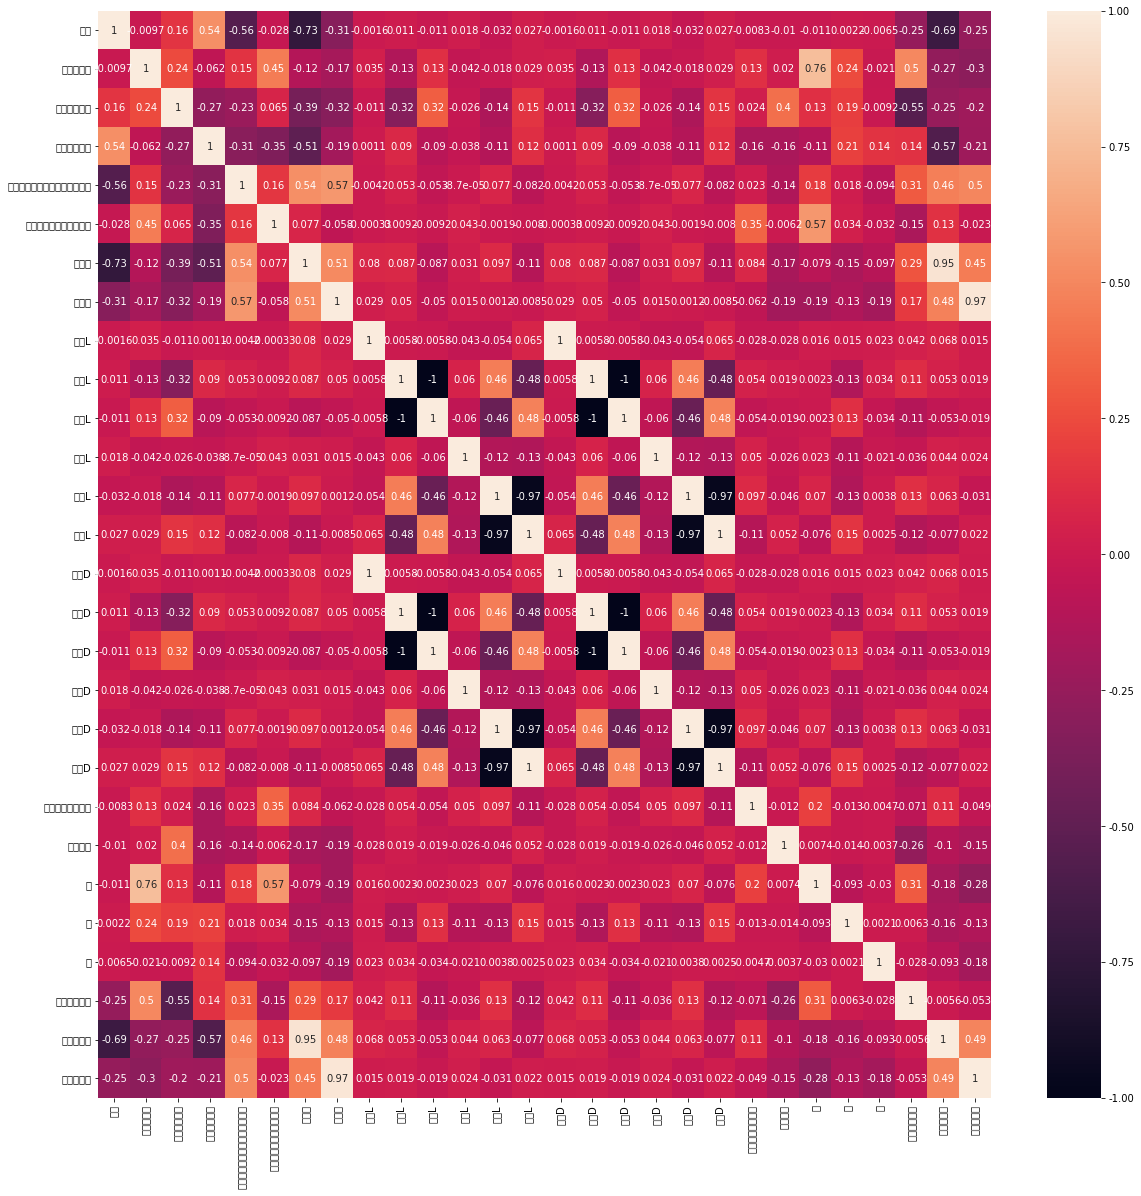

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(data = train.corr(), annot=True)